# 1. Import Required Libraries

In [3]:
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pynance as pn
import yfinance as yf


# 2. Load the CSVs into DataFrames

In [4]:
folder_path = '../data/stocks'
stock_data = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        name = filename.split('_')[0]
        df = pd.read_csv(os.path.join(folder_path, filename))
        df['Date'] = pd.to_datetime(df['Date'])
        df.sort_values('Date', inplace=True)
        stock_data[name] = df


# 3. Calculate Technical Indicators (TA-Lib)

In [5]:
df = stock_data['AAPL']
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


# 4. Basic Visualizations

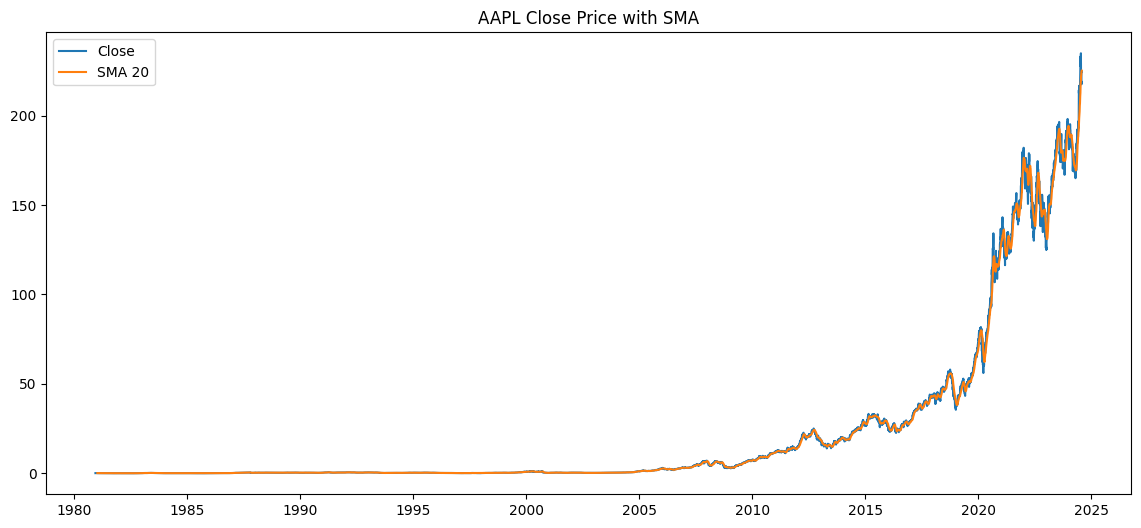

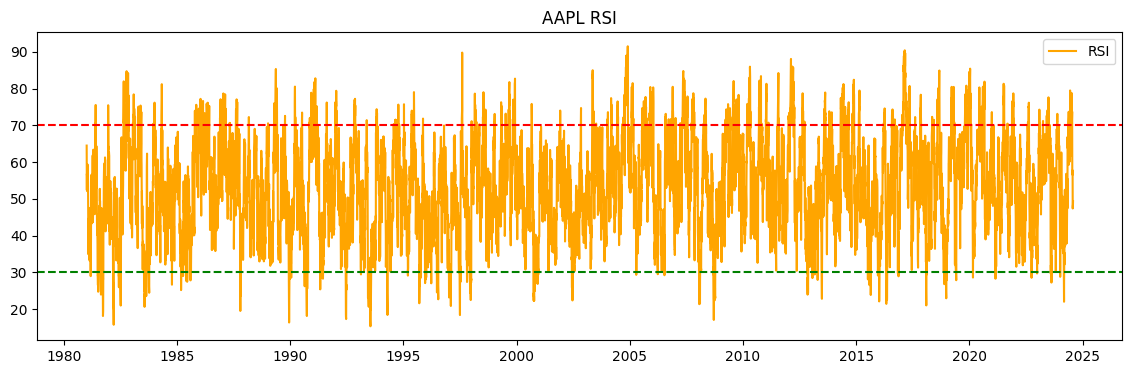

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.title('AAPL Close Price with SMA')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('AAPL RSI')
plt.legend()
plt.show()


# 5. Use PyNance (Optional for KPIs)

200.18


<Axes: title={'center': 'AAPL Close Price (Last 6 Months)'}, xlabel='Date'>

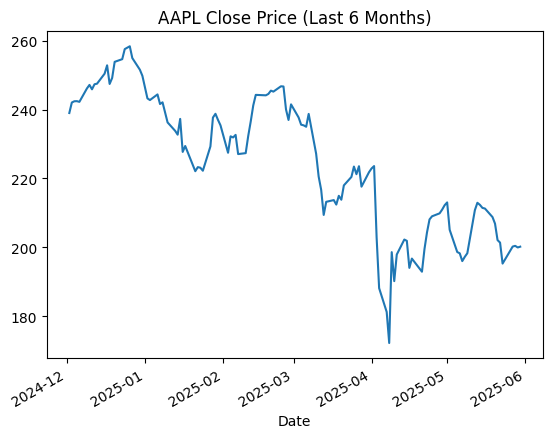

In [7]:

aapl = yf.Ticker("AAPL")
hist = aapl.history(period="6mo")

print(aapl.info['currentPrice'])

hist['Close'].plot(title="AAPL Close Price (Last 6 Months)")

# 6. Save Processed Files (Optional)

In [8]:
for name, df in stock_data.items():
    df.to_csv(f"../data/processed/{name}_indicators.csv", index=False)
